# Image Data Augmentation Using Deep Convolutional Generative Adversarial Network (DCGAN)
# Data Exploration

## Load Libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Load Data

In [2]:
# Load an image and mask from the training dataset
i = 0
img = []
for root, dirs, files in os.walk("data/train/stage1_train"):
    if len(files) > 0:
        for afile in files:
            img.append(mpimg.imread(os.path.join(root, afile)))
            i+=1
    # if an 2 files have been loaded, quit.
    if i>1:
        break

## Explore the Image Data

In [3]:
# First image is the actual image, the second is the mask.
print(img[0].shape, img[1].shape)

(520, 696, 4) (520, 696)


In [4]:
img[0]

array([[[0.3764706 , 0.3764706 , 0.3764706 , 1.        ],
        [0.38431373, 0.38431373, 0.38431373, 1.        ],
        [0.3529412 , 0.3529412 , 0.3529412 , 1.        ],
        ...,
        [0.1882353 , 0.1882353 , 0.1882353 , 1.        ],
        [0.2       , 0.2       , 0.2       , 1.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        ]],

       [[0.37254903, 0.37254903, 0.37254903, 1.        ],
        [0.35686275, 0.35686275, 0.35686275, 1.        ],
        [0.34117648, 0.34117648, 0.34117648, 1.        ],
        ...,
        [0.1764706 , 0.1764706 , 0.1764706 , 1.        ],
        [0.19215687, 0.19215687, 0.19215687, 1.        ],
        [0.21568628, 0.21568628, 0.21568628, 1.        ]],

       [[0.34509805, 0.34509805, 0.34509805, 1.        ],
        [0.34117648, 0.34117648, 0.34117648, 1.        ],
        [0.31764707, 0.31764707, 0.31764707, 1.        ],
        ...,
        [0.16862746, 0.16862746, 0.16862746, 1.        ],
        [0.1882353 , 0.188235

In [5]:
img[1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

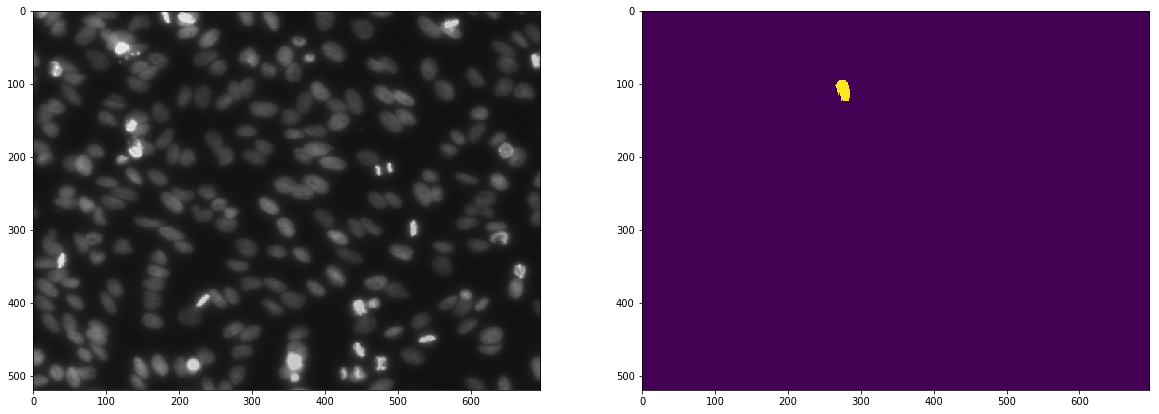

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img[0])
plt.subplot(122)
plt.imshow(img[1])
plt.show()

In [7]:
# Add am additional dimension to the mask so that it can be combined with the image. We need to do this because the combined image and mask
# needs to be generated by the GAN generator together. 
# same as - new_mask = img[1][:, :, np.newaxis]
new_mask = img[1].reshape((520, 696, 1))

In [8]:
new_mask.shape

(520, 696, 1)

In [9]:
new_mask

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)

In [10]:
# Add the mask to the image as an additional channel
image_and_mask = np.concatenate((img[0], new_mask), axis=2)
image_and_mask.shape

(520, 696, 5)

In [11]:
image_and_mask

array([[[0.3764706 , 0.3764706 , 0.3764706 , 1.        , 0.        ],
        [0.38431373, 0.38431373, 0.38431373, 1.        , 0.        ],
        [0.3529412 , 0.3529412 , 0.3529412 , 1.        , 0.        ],
        ...,
        [0.1882353 , 0.1882353 , 0.1882353 , 1.        , 0.        ],
        [0.2       , 0.2       , 0.2       , 1.        , 0.        ],
        [0.21960784, 0.21960784, 0.21960784, 1.        , 0.        ]],

       [[0.37254903, 0.37254903, 0.37254903, 1.        , 0.        ],
        [0.35686275, 0.35686275, 0.35686275, 1.        , 0.        ],
        [0.34117648, 0.34117648, 0.34117648, 1.        , 0.        ],
        ...,
        [0.1764706 , 0.1764706 , 0.1764706 , 1.        , 0.        ],
        [0.19215687, 0.19215687, 0.19215687, 1.        , 0.        ],
        [0.21568628, 0.21568628, 0.21568628, 1.        , 0.        ]],

       [[0.34509805, 0.34509805, 0.34509805, 1.        , 0.        ],
        [0.34117648, 0.34117648, 0.34117648, 1.        , 0. 

# Explore the whole training dataset

In [12]:
# Count the number of masks per image
image_list = []
new_image = False
for root, dirs, files in os.walk("data/train/stage1_train"):
    for afile in files:
        # if an image file
        rootdir = root.split('/')
        if rootdir[len(rootdir) - 1] == 'images':
            # This is an image file
            new_image = True
            image_id = rootdir[len(rootdir) - 2]
        elif new_image:
            # This is not an image file, it is therefore a mask file.
            # There is an image file already read, combine image and mask.
            num_mask = len(files)
            image_list.append([image_id, num_mask])
            new_image = False

In [13]:
image_list[0:5]

In [14]:
# Find biggest number of masks
num_mask_list = []
for i in image_list:
    num_mask_list.append(i[1])
max(num_mask_list)

375

There are too many masks per image for themto be added as separate channels in each image.